# Advanced Matplotlib Commands Lecture

### NOTE: There is no video for the notebook since its really just a reference for what method calls to look for. We also highly recommend doing a quick StackOverflow search if you're in need of a quick answer to what Matplotlib method to use for a particular case.

In this lecture we  cover some more advanced topics which you won't usually use as often. You can always reference the documentation for more resources!

#### Environment setup

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.pyplot import cm
import numpy as np

In [3]:
# update the figure in formation
mpl.rcParams.update({'font.size': 13,
                     'text.color': 'black',
                     'figure.facecolor': 'white',
                     'figure.edgecolor':'white',
                     'xtick.labelcolor': 'black',
                     'axes.facecolor': 'white',
                     'axes.edgecolor': 'black'})

#### Input

In [4]:
x = np.linspace(0, 5, 10)

#### Logarithmic scale

It is also possible to set a logarithmic scale for one or both axes. This functionality is in fact only one application of a more general transformation system in Matplotlib. Each of the axes' scales are set seperately using `set_xscale` and `set_yscale` methods which accept one parameter (with the value "log" in this case):

C:\Users\admin\AppData\Local\Temp/ipykernel_12180/195561852.py:11: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax[1].set_ylim(0, 1000)


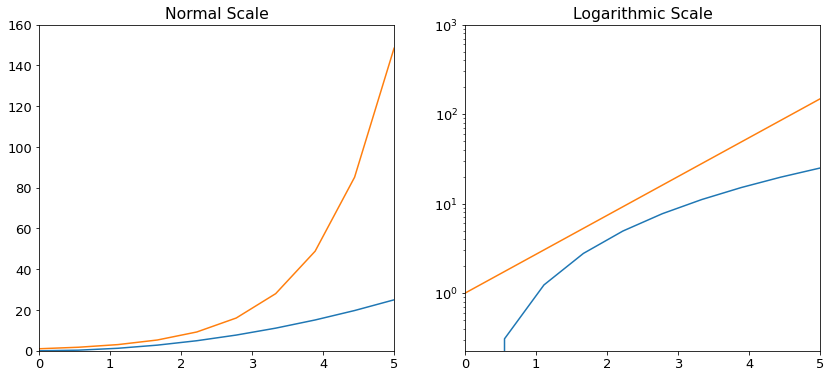

In [5]:
fig_log, ax = plt.subplots(1, 2, figsize=(14,6))

ax[0].plot(x, x**2, x, np.exp(x))
ax[0].set_title("Normal Scale")
ax[0].set_ylim(0, 160)
ax[0].set_xlim(0,5)

ax[1].plot(x, x**2, x, np.exp(x))
ax[1].set_yscale('log') # Turn it into the logarithmic scale
ax[1].set_title("Logarithmic Scale")
ax[1].set_ylim(0, 1000)
ax[1].set_xlim(0,5);

#### Placement of ticks and custom tick labels

We can explicitly determine where we want the axis ticks with `set_xticks` and `set_yticks`, which both take a list of values for where on the axis the ticks are to be placed. We can also use the `set_xticklabels` and `set_yticklabels` methods to provide a list of custom text labels for each tick location:

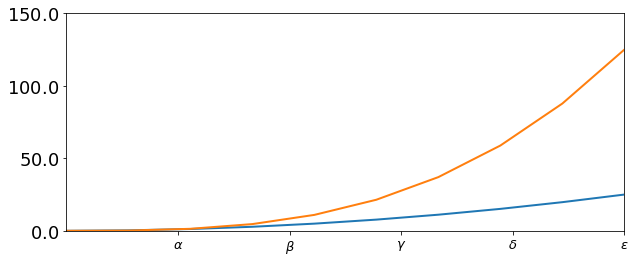

In [6]:
fig_tick, ax = plt.subplots(figsize=(10,4))
ax.plot(x, x**2, x, x**3, lw=2)
# set the x ticks and x ticks label
xticks = [1, 2, 3, 4, 5]
ax.set_xticks(xticks)
ax.set_xticklabels(labels = [r'$\alpha$', r'$\beta$', r'$\gamma$', r'$\delta$', r'$\epsilon$'], fontsize=13)
# set the y ticks and y ticks label - custom the y tick label
yticks = [0, 50, 100, 150]
ax.set_yticks(yticks)
ax.set_yticklabels(labels= ['$%.1f$' % y for y in yticks], fontsize=18)

ax.set_xlim(0,5)
ax.set_ylim(0, 150)
plt.show()

#### Science notation

With large numbers on axes, it is often better use scientific notation:

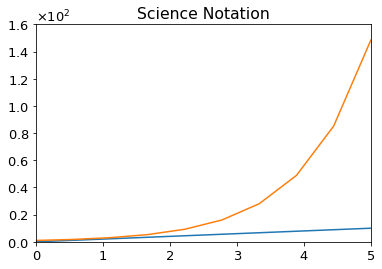

In [7]:
fig_science, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(x, x*2, x, np.exp(x))
ax.set_title("Science Notation")
from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) # set the science notation
formatter.set_powerlimits((-1,1)) # set the power limit
ax.yaxis.set_major_formatter(formatter) # apply the formatter into the y axis
ax.set_xlim(0,5)
ax.set_ylim(0,160);

#### Axis number and axis label spacing
* Get the distance between the number and axes
* Get the distance between the axes label and axes

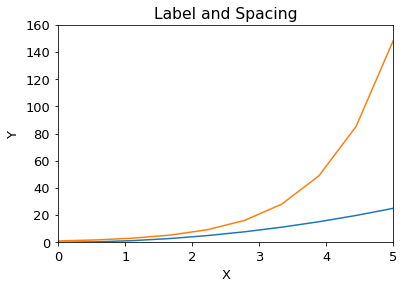

In [8]:
# change the distance between the number and axes
mpl.rcParams.update({'xtick.major.pad': 5,
                     'ytick.major.pad': 5})
fig_axis_space_1, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(x, x **2, x, np.exp(x))
ax.set_title("Label and Spacing")

ax.set_xlabel("X")
ax.set_ylabel("Y")

# change the distance between the axis label and axes
ax.xaxis.labelpad = 5
ax.yaxis.labelpad = 5

ax.set_xlim(0,5)
ax.set_ylim(0,160);

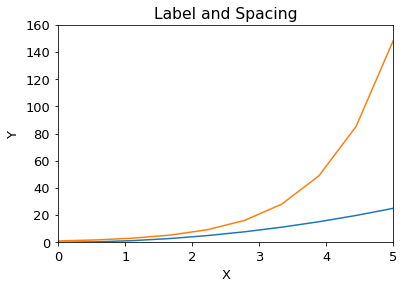

In [9]:
# change the distance between the number and axes
mpl.rcParams.update({'xtick.major.pad': 5,
                     'ytick.major.pad': 5})
fig_axis_space_2, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(x, x **2, x, np.exp(x))
ax.set_title("Label and Spacing")

# change the distance between the axis label and axes
ax.set_xlabel("X", labelpad= 5)
ax.set_ylabel("Y", labelpad= 5)


ax.set_xlim(0,5)
ax.set_ylim(0,160);

In [10]:
# reset the distance between the number and axes

mpl.rcParams.update({'xtick.major.pad': 3,
                     'ytick.major.pad': 3})

#### Axis position adjustments

Unfortunately, when saving figures the labels are sometimes clipped, and it can be necessary to adjust the positions of axes a little bit. This can be done using subplots_adjust:

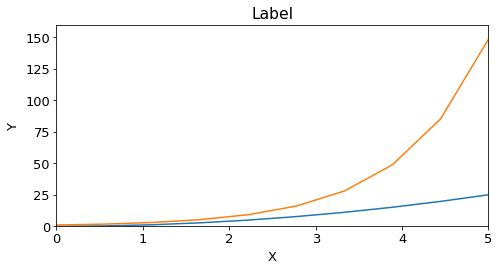

In [11]:
fig_position, ax = plt.subplots(ncols=1, nrows=1)

ax.plot(x, x**2, x, np.exp(x))

ax.set_xlim(0, 5)
ax.set_ylim(0, 160)

ax.set_title('Label')
ax.set_xlabel('X', labelpad=5)
ax.set_ylabel('Y', labelpad=5)

# change the axis position
fig_position.subplots_adjust(left=0.2, right= 1.2, top=0.9, bottom=0.2)

#### Axis Grid

With the `grid` method in the axis object, we can turn on and off grid lines. We can also customize the appearance of the grid lines using the same keyword arguments as the plot function:

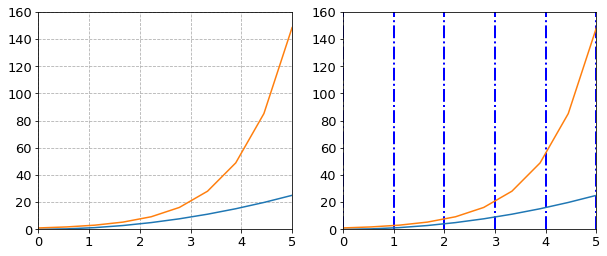

In [12]:
fig_grid, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

ax[0].plot(x, x**2, x, np.exp(x))
ax[0].set_xlim(0, 5)
ax[0].set_ylim(0, 160)
ax[0].grid(visible=True, axis='both', linestyle='dashed') # adding a grid

ax[1].plot(x, x**2, x, np.exp(x))
ax[1].set_xlim(0, 5)
ax[1].set_ylim(0, 160)
ax[1].grid(visible=True, axis='x', linestyle='-.', linewidth=2, color='blue') # adding grid only for x

#### Axis spines
* An axis spine -- the line noting the data area boundaries. Spines are the lines connecting the axis tick marks and noting the boundaries of the data area.

We can also change the properties of axis spines:

`matplotlib.spines.Spines`: The container of all Spines in an Axes.
The interface is dict-like mapping names (e.g. 'left') to Spine objects. Additionally it implements some pandas.

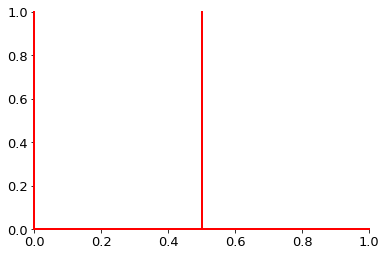

In [13]:
fig_spine, ax = plt.subplots(nrows=1, ncols=1)

ax.spines['bottom'].set_color('blue') # set the bottom spines
ax.spines.left.set_color('red') # set the left spines
ax.spines[['top', 'right']].set_visible(False) # set the visible of top and right spines
ax.spines[:].set_color('red') # set all the spines to red color
ax.spines['right'].set_visible(True)
ax.spines['right'].set_position(('axes', 0.5)) # move the right spines to middle position
ax.spines[:].set_linewidth(2) # change the linewidth

#### Twin axes
Sometimes it is useful to have dual x or y axes in a figure; for example, when plotting curves with different units together. Matplotlib supports this with the `twinx` and `twiny` functions:

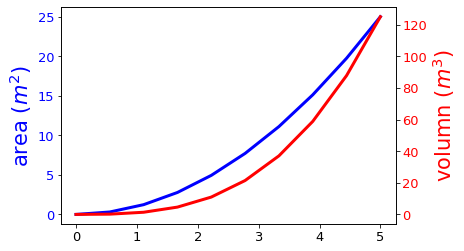

In [14]:
fig_twin, ax1 = plt.subplots(nrows=1, ncols=1)
ax1.plot(x, x**2, linewidth=3, color='blue')
ax1.set_ylabel("area $(m^2)$", fontsize=21, color='blue')

for label in ax1.get_yticklabels(): # get all the y stick label
    label.set_color('blue')

ax2 = ax1.twinx()
ax2.plot(x, x**3, linewidth=3, color='red')
ax2.set_ylabel('volumn $(m^3)$', fontsize=21, color='red')

for label in ax2.get_yticklabels():
    label.set_color('red')

#### Axes where x and y is zero

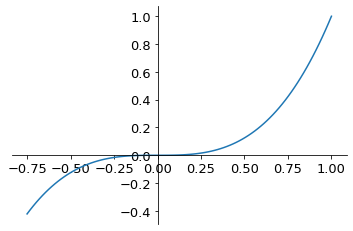

In [15]:
fig_zero, ax = plt.subplots(nrows=1, ncols=1)
ax.spines[['top', 'right']].set_visible(False) # unvisible the top and right
ax.spines[['bottom', 'left']].set_position(('data', 0)) # move the spine to 0,0 position

# set tick position
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

xx = np.linspace(-0.75, 1, 100)
ax.plot(xx, xx**3)

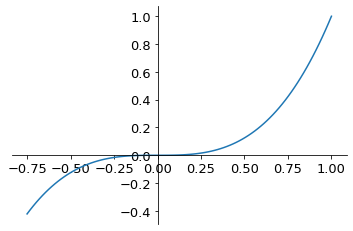

In [16]:
fig_zero_1, ax = plt.subplots()
# unvisible the top and right
ax.spines[['top', 'right']].set_color(None)

# set tick position
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
# set the spine position
ax.spines[['bottom', 'left']].set_position(('data', 0))
xx = np.linspace(-0.75, 1, 100)
ax.plot(xx, xx**3)

#### Other 2D plot styles
In addition to the regular `plot` method, there are a number of other functions for generating different kind of plots. See the matplotlib plot gallery for a complete list of available plot types: http://matplotlib.org/gallery.html. Some of the more useful ones are show below:

Text(0.5, 1.0, 'Fill Between')

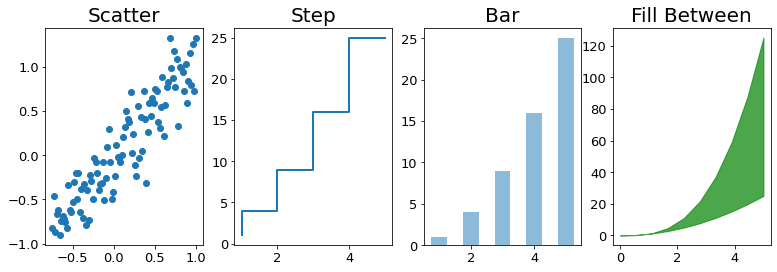

In [17]:
n = np.array([1, 2, 3, 4, 5])

fig_2D, ax = plt.subplots(nrows=1, ncols=4, figsize=(13,4))

ax[0].scatter(xx, xx + 0.25*np.random.randn(len(xx)))
ax[0].set_title('Scatter', size=20)

ax[1].step(n, n**2, lw=2)
ax[1].set_title('Step', size=20)

ax[2].bar(n, n**2, lw=2, align='center', width=0.5, alpha=0.5)
ax[2].set_title('Bar', size=20)

ax[3].fill_between(x, x**2, x**3, alpha=0.7, color='Green')
ax[3].set_title('Fill Between', size=20)


#### Text annotation
Annotating text in matplotlib figures can be done using the `text` function. It supports LaTeX formatting just like axis label texts and titles:


Text(0.75, 0.2, 'Y = $X^3$')

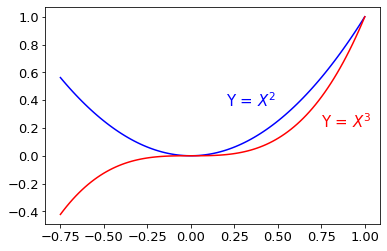

In [18]:
fig_text_annotation, ax = plt.subplots()

ax.plot(xx, xx**2, 'blue', xx, xx**3, 'red')

ax.text(x=0.2, y=0.35, s='Y = $X^2$', size=15, color='blue')
ax.text(x=0.75, y=0.2, s='Y = $X^3$', size=15, color='red')

### Figures with multiple subplots and insets

Axes can be added to a matplotlib Figure canvas manually using `fig.add_axes` or using a sub-figure layout manager such as `subplots`, `subplot2grid`, or `gridspec`:

#### Subplot

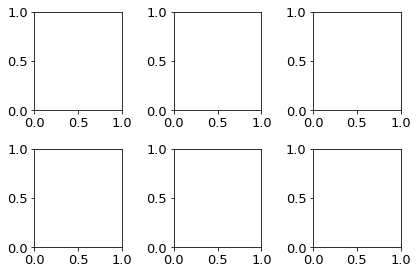

In [19]:
fig_subplot, ax = plt.subplots(2, 3)
fig_subplot.tight_layout()

#### subplot2grid

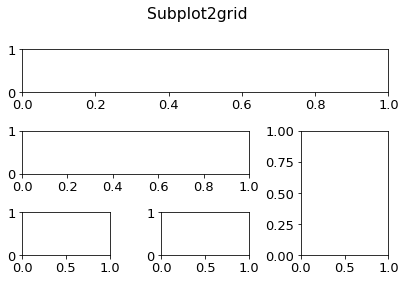

In [30]:
fig_subplot2grid = plt.figure()

fig_subplot2grid.suptitle('Subplot2grid')
# subplot2grid
# shape : sequence of 2 ints - Shape of grid in which to place axis. First entry is number of rows, second entry is number of columns.
# loc: sequence of 2 ints - Location to place axis within grid. First entry is row number, second entry is column number.
ax1 = plt.subplot2grid(shape=(3,3), loc=(0,0), colspan=3)
ax2 = plt.subplot2grid(shape=(3,3), loc=(1,0), colspan=2)
ax3 = plt.subplot2grid(shape=(3,3), loc=(1,2), rowspan=2)
ax4 = plt.subplot2grid(shape=(3,3), loc=(2,0))
ax5 = plt.subplot2grid(shape=(3,3), loc=(2,1))

fig_subplot2grid.tight_layout()



#### add_axes

Manually adding axes with add_axes is useful for adding insets to figures:

Text(0.5, 1.0, 'Zoom near the origin')

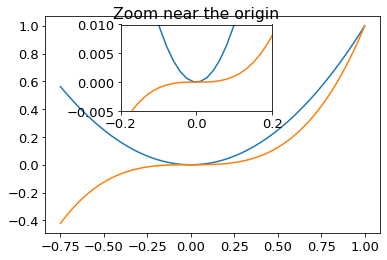

In [52]:
fig_add_axes, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(xx, xx**2, xx, xx**3)

ax1 = fig_add_axes.add_axes(rect=[0.3, 0.55, 0.35, 0.3]) # left, bottom, width, height
ax1.plot(xx, xx**2, xx, xx**3)
ax1.set_xlim(-0.2, 0.2)
ax1.set_ylim(-0.005, 0.01)
ax1.set_title(label='Zoom near the origin')